# <a id='toc1_'></a>[📊 Análise Exploratória de Dados — Parte 1](#toc0_)

**Nesta primeira etapa da EDA (Exploratory Data Analysis), examinarei cada tabela de forma isolada com o objetivo de identificar possíveis inconsistências, outliers, valores nulos, e erros de entrada nos dados.**

🔍 A análise será conduzida de maneira sistemática, priorizando:

- Estrutura e tipos de dados  
- Distribuições estatísticas  
- Detecção de valores faltantes e inválidos  
- Identificação de padrões suspeitos ou anomalias  

Esse processo é essencial para garantir a qualidade dos dados antes de aplicar qualquer técnica de limpeza ou transformação.

**Tópicos do Notebook**<a id='toc0_'></a>    
- [📊 Análise Exploratória de Dados — Parte 1](#toc1_)    
- [Importações e Extração dos Dados](#toc2_)    
- [Análise Exploratória de Dados (EDA)](#toc3_)    
  - [Tabela: olist_geolocation](#toc3_1_)    
    - [Resumo da tabela](#toc3_1_1_)    
    - [Coluna "geolocation_zip_code_prefix"](#toc3_1_2_)    
    - [Colunas "geolocation_lat" e "geolocation_lng"](#toc3_1_3_)    
    - [Coluna "geolocation_city"](#toc3_1_4_)    
      - [Funções para análise de colunas de cidades](#toc3_1_4_1_)    
    - [Coluna "geolocation_state"](#toc3_1_5_)    
  - [Tabela: olist_customers](#toc3_2_)    
    - [Resumo da Tabela](#toc3_2_1_)    
    - [Coluna "customer_zip_code_prefix"](#toc3_2_2_)    
    - [Coluna "customer_city"](#toc3_2_3_)    
    - [Coluna "customer_state"](#toc3_2_4_)    
  - [Tabela: olist_sellers](#toc3_3_)    
    - [Resumo da Tabela](#toc3_3_1_)    
    - [Coluna "seller_zip_code_prefix"](#toc3_3_2_)    
    - [Coluna "seller_city"](#toc3_3_3_)    
    - [Coluna "seller_state"](#toc3_3_4_)    
  - [Tabela: olist_products](#toc3_4_)    
    - [Resumo da Tabela](#toc3_4_1_)    
    - [Analisando Valores ausentes/nulos](#toc3_4_2_)    
  - [Tabela: olist_orders](#toc3_5_)    
    - [Resumo da Tabela](#toc3_5_1_)    
    - [Analisando dados ausentes/nulos + Coluna "order_status"](#toc3_5_2_)    
  - [Tabela: olist_order_items](#toc3_6_)    
    - [Resumo da tabela](#toc3_6_1_)    
    - [Coluna "shipping_limit_date"](#toc3_6_2_)    
    - [Coluna "price"](#toc3_6_3_)    
    - [Coluna "freight_value"](#toc3_6_4_)    
  - [Tabela: olist_order_payments](#toc3_7_)    
    - [Resumo da tabela](#toc3_7_1_)    
    - [Coluna "payment_sequential"](#toc3_7_2_)    
    - [Coluna "payment_installments"](#toc3_7_3_)    
    - [Coluna "payment_value"](#toc3_7_4_)    
    - [Coluna "payment_type"](#toc3_7_5_)    
  - [Tabela: olist_order_reviews](#toc3_8_)    
    - [Resumo da tabela](#toc3_8_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Importações e Extração dos Dados](#toc0_)


In [ ]:
import pandas as pd  # Biblioteca para leitura e manipulação de dados tabulares
import numpy as np  # Biblioteca para operações numéricas e estatísticas
import matplotlib.pyplot as plt  # Biblioteca para geração de gráficos básicos (visualização inicial dos dados)
import seaborn as sns  # Biblioteca para gráficos estatísticos mais avançados e visualmente atraentes
import unicodedata # Para padronização dos Dados
import re # Biblioteca para uso de expressões regulares, útil na limpeza e validação de dados textuais
from sqlalchemy import create_engine  # Utilizada para criar uma conexão com bancos de dados SQL (ex: MySQL)

In [ ]:
# Estabelecendo conexão com o banco de dados MySQL usando SQLAlchemy

conn = create_engine("mysql+mysqlconnector://root:...")

In [ ]:
# Extração completa das tabelas do banco de dados para análise em pandas

olist_geolocation = pd.read_sql(
    "SELECT * FROM olist_geolocation", con=conn)

olist_customers = pd.read_sql(
    "SELECT * FROM olist_customers", con=conn)

olist_sellers = pd.read_sql(
    "SELECT * FROM olist_sellers", con=conn)

olist_products = pd.read_sql(
    "SELECT * FROM olist_products", con=conn)

olist_orders = pd.read_sql(
    "SELECT * FROM olist_orders", con=conn)

olist_order_items = pd.read_sql(
    "SELECT * FROM olist_order_items", con=conn)

olist_order_payments = pd.read_sql(
    "SELECT * FROM olist_order_payments", con=conn)

olist_order_reviews = pd.read_sql(
    "SELECT * FROM olist_order_reviews", con=conn)

# <a id='toc3_'></a>[Análise Exploratória de Dados (EDA)](#toc0_)

**Análise Individual por Tabela e Variável**


## <a id='toc3_1_'></a>[Tabela: olist_geolocation](#toc0_)


### <a id='toc3_1_1_'></a>[Resumo da tabela](#toc0_)


In [4]:
# Visualização das primeiras linhas para entender estrutura, tipos e possíveis padrões nos dados
olist_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.5456,-46.6393,sao paulo,SP
1,1046,-23.5461,-46.6448,sao paulo,SP
2,1046,-23.5461,-46.6430,sao paulo,SP
3,1041,-23.5444,-46.6395,sao paulo,SP
4,1035,-23.5416,-46.6416,sao paulo,SP


In [5]:
# Análise inicial da tabela: tipos de dados, quantidade de entradas, valores nulos
olist_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [6]:
# Resumo estatístico da tabela
olist_geolocation.describe(include="all") # Acrescentando o Parâmetro (include="all") para inclusão dos dados categoricos no resumo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1000163,1.000163e+06,1.000163e+06,1000163,1000163
unique,19015,NaN,NaN,8011,27
top,24220,NaN,NaN,sao paulo,SP
freq,1146,NaN,NaN,135800,404268
mean,NaN,-2.117615e+01,-4.639054e+01,NaN,NaN
std,NaN,5.715866e+00,4.269748e+00,NaN,NaN
min,NaN,-3.660540e+01,-1.014670e+02,NaN,NaN
25%,NaN,-2.360350e+01,-4.857315e+01,NaN,NaN
50%,NaN,-2.291940e+01,-4.663790e+01,NaN,NaN
75%,NaN,-1.997960e+01,-4.376770e+01,NaN,NaN


In [ ]:
# Função auxiliar para identificar e retornar todas as linhas duplicadas em um DataFrame

def encontrar_linhas_duplicadas(df):
    """
    Retorna todas as instâncias duplicadas em um DataFrame (todas as colunas iguais).

    Parâmetros:
        df (pd.DataFrame): DataFrame a ser analisado.

    Retorna:
        pd.DataFrame: Linhas duplicadas (excluindo a primeira ocorrência).
    """
    duplicadas = df[df.duplicated(keep=False)]
    return duplicadas

In [ ]:
# Aplica a função de verificação de duplicatas no DataFrame 'olist_geolocation'
# A função retorna todas as linhas completamente duplicadas (considerando todas as colunas)
encontrar_linhas_duplicadas(olist_geolocation)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.5456,-46.6393,sao paulo,SP
1,1046,-23.5461,-46.6448,sao paulo,SP
2,1046,-23.5461,-46.6430,sao paulo,SP
6,1047,-23.5463,-46.6412,sao paulo,SP
7,1013,-23.5469,-46.6343,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.3433,-51.8737,ciriaco,RS
1000154,99950,-28.0705,-52.0113,tapejara,RS
1000159,99900,-27.8771,-52.2249,getulio vargas,RS
1000160,99950,-28.0719,-52.0147,tapejara,RS


In [ ]:
# Verificando se a função de identificação de duplicatas está correta
# Criação de um filtro com múltiplas condições para localizar registros específicos no DataFrame

filtro = (
    (olist_geolocation['geolocation_zip_code_prefix'] == '99900') &
    (olist_geolocation['geolocation_lat'] == -27.8771) &
    (olist_geolocation['geolocation_lng'] == -52.2249) &
    (olist_geolocation['geolocation_city'] == 'getulio vargas') &
    (olist_geolocation['geolocation_state'] == 'RS')
)

# Aplicando o filtro para extrair todas as linhas que correspondem exatamente aos critérios definidos
dados_filtrados = olist_geolocation[filtro]

# Exibindo o resultado
display(dados_filtrados)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
999802,99900,-27.8771,-52.2249,getulio vargas,RS
1000159,99900,-27.8771,-52.2249,getulio vargas,RS


✅ A função `encontrar_linhas_duplicadas()` está funcionando corretamente.  
As linhas filtradas manualmente coincidem com as duplicatas identificadas automaticamente no DataFrame `olist_geolocation`.

### <a id='toc3_1_2_'></a>[Coluna "geolocation_zip_code_prefix"](#toc0_)


In [ ]:
# Verificando o intervalo de valores presentes na coluna de CEPs ('geolocation_zip_code_prefix')
# Essa análise ajuda a entender o padrão e a faixa de valores cadastrados no dataset
olist_geolocation["geolocation_zip_code_prefix"].min(), olist_geolocation["geolocation_zip_code_prefix"].max()

('1001', '99990')

**Verificação de integridade na coluna.**

- A coluna foi classificada como tipo 'object' pelo Pandas, indicando que pode conter caracteres não numéricos.
- Isso pode representar erro, já que um prefixo de código postal deveria conter apenas dígitos.
- Utiliza-se expressão regular para identificar valores que contenham qualquer caractere que não seja número.


In [ ]:
# Define uma expressão regular para identificar qualquer caractere que não seja numérico
padrao = r"[^0-9]"

# Aplica a verificação em cada valor da coluna 'geolocation_zip_code_prefix'
# Retorna True se o valor contém algum caractere não numérico (indicando erro)
# Em seguida, conta quantos valores válidos (False) e inválidos (True) existem
olist_geolocation["geolocation_zip_code_prefix"].apply(lambda x: bool(re.search(padrao, str(x)))).value_counts()


geolocation_zip_code_prefix
False    1000163
Name: count, dtype: int64

### <a id='toc3_1_3_'></a>[Colunas "geolocation_lat" e "geolocation_lng"](#toc0_)


In [ ]:
# Verificando os valores mínimo e máximo da coluna 'geolocation_lat'
# A latitude deve obrigatoriamente estar no intervalo de -90. a +90. graus
# Valores fora desse intervalo indicam erro ou dado corrompido
olist_geolocation["geolocation_lat"].min(), olist_geolocation["geolocation_lat"].max()

(-36.6054, 45.0659)

In [ ]:
# Verificando os valores mínimo e máximo da coluna 'geolocation_lng'
# A longitude deve obrigatoriamente estar no intervalo de -180 a +180 graus
# Valores fora desse intervalo indicam erro ou coordenada inválida
olist_geolocation["geolocation_lng"].min(), olist_geolocation["geolocation_lng"].max()

(-101.467, 121.105)

### <a id='toc3_1_4_'></a>[Coluna "geolocation_city"](#toc0_)


#### 🔧 Funções Criadas para Automatizar a Análise de Colunas de Cidades

Para evitar repetição de códigos e facilitar a análise de outras tabelas com colunas de nomes de cidades, foram criadas três funções específicas. Elas automatizam etapas comuns de limpeza e validação, permitindo aplicar os mesmos critérios de forma rápida e consistente:

1. **`analisar_variacao_de_valores()`**  
   Compara a quantidade de valores únicos **antes e depois da normalização** (remoção de acentos, conversão para minúsculas e remoção de espaços) em uma coluna.  
   Útil para identificar variações desnecessárias causadas por inconsistências de digitação ou formatação.

2. **`checar_abreviacoes()`**  
   Localiza valores com poucos caracteres, que podem indicar **abreviações ou registros incompletos**.  
   Por padrão, analisa entradas com até 3 caracteres.

3. **`checar_valores_com_numeros()`**  
   Detecta valores que contêm **dígitos numéricos**, o que é incomum em nomes de cidades e pode sinalizar erros de entrada ou contaminação da coluna com outros tipos de dados.

Essas funções tornam o processo mais eficiente e padronizado, permitindo reaproveitamento fácil em diferentes tabelas do dataset.


In [14]:
def analisar_variacao_de_valores(df, nome_coluna):
    """
    Analisa a diferença entre os valores únicos originais e os valores únicos após normalização
    (remoção de acentos, conversão para minúsculas e remoção de espaços) em uma coluna específica.

    Parâmetros:
        df (pd.DataFrame): DataFrame que contém a coluna a ser analisada.
        nome_coluna (str): Nome da coluna que será normalizada e analisada.

    Retorna:
        dict: Dicionário com contagem de valores únicos antes e depois, e o delta.
    """
    
    # Função interna para remover acentos
    def remover_acentos(texto):
        return unicodedata.normalize('NFKD', str(texto)).encode('ASCII', 'ignore').decode('utf-8')

    # Coluna original
    coluna = df[nome_coluna]

    # Criando versão padronizada
    coluna_normalizada = (
        coluna
        .astype(str)
        .str.lower()
        .str.strip()
        .apply(remover_acentos)
    )

    # Comparando os conjuntos
    n_original = coluna.nunique()
    n_normalizada = coluna_normalizada.nunique()
    delta = n_original - n_normalizada

    # Exibe o resultado
    print(f"Análise da coluna: '{nome_coluna}'")
    print(f"Valores únicos (original): {n_original}")
    print(f"Valores únicos (normalizados): {n_normalizada}")
    print(f"Variações possivelmente causadas por acentos, caixa ou espaços: {delta}")

    return {
        "coluna": nome_coluna,
        "valores_unicos_original": n_original,
        "valores_unicos_normalizados": n_normalizada,
        "delta": delta
    }


In [15]:
def checar_abreviacoes(df, nome_coluna, limite_caracteres=3):
    """
    Identifica valores com poucos caracteres (possíveis abreviações) em uma coluna específica.

    Parâmetros:
        df (pd.DataFrame): DataFrame com os dados.
        nome_coluna (str): Nome da coluna a ser analisada.
        limite_caracteres (int): Número máximo de caracteres para considerar uma possível abreviação. Padrão é 3.

    Retorna:
        list: Lista de valores únicos com tamanho menor ou igual ao limite definido.
    """

    # Garante que os dados sejam string e não nulos
    coluna = df[nome_coluna].dropna().astype(str)

    # Filtra os valores curtos
    filtro = coluna[coluna.str.len() <= limite_caracteres]

    # Valores únicos
    valores_curto = filtro.unique()

    # Exibe resultado
    print(f"Valores com {limite_caracteres} ou menos caracteres na coluna '{nome_coluna}':")
    print(valores_curto)

    return list(valores_curto)


In [16]:
def checar_valores_com_numeros(df, nome_coluna):
    """
    Identifica e exibe valores em uma coluna que contêm dígitos numéricos.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados.
        nome_coluna (str): Nome da coluna a ser inspecionada.

    Retorna:
        pd.Series: Série com os valores únicos e suas contagens que contêm números.
    """
    filtro = df[df[nome_coluna].astype(str).str.contains(r'\d', regex=True)]
    print(f"Valores com números encontrados na coluna '{nome_coluna}':")
    print(filtro[nome_coluna].value_counts())
    print(f"\nTotal de registros com números: {len(filtro)}")
    return filtro[nome_coluna].value_counts()

In [ ]:
# Aplicando a função de análise de variação de valores únicos na coluna 'geolocation_city'
# A função compara a quantidade de valores únicos antes e depois da normalização
# Isso ajuda a identificar variações causadas por inconsistências como acentos, maiúsculas/minúsculas e espaços
analise = analisar_variacao_de_valores(olist_geolocation, "geolocation_city")

Análise da coluna: 'geolocation_city'
Valores únicos (original): 8011
Valores únicos (normalizados): 5967
Variações possivelmente causadas por acentos, caixa ou espaços: 2044


In [ ]:
# Utilizando a função 'checar_abreviacoes' para identificar possíveis abreviações
# Analisa valores na coluna 'geolocation_city' com até 3 caracteres, que podem indicar nomes truncados ou erros
analise = checar_abreviacoes(olist_geolocation, "geolocation_city", 3)

Valores com 3 ou menos caracteres na coluna 'geolocation_city':
['sp' 'poa' 'poá' 'itu' 'uru' 'jau' 'jaú' 'rj' 'bh' 'luz' 'uba' 'ubá'
 'una' 'ibo' 'exu' 'acu' 'açu' 'ipu' 'ico' 'icó' 'ita' 'itá' 'ipe' 'ipê']


In [ ]:
# Aplicando a função 'checar_valores_com_numeros' para detectar valores que contêm dígitos numéricos
# Essa análise é importante para identificar entradas inválidas ou inconsistentes na coluna 'geolocation_city'
analise = checar_valores_com_numeros(olist_geolocation, "geolocation_city")

Valores com números encontrados na coluna 'geolocation_city':
geolocation_city
quilometro 14 do mutum             2
4º centenario                      2
colônia z-3                        2
são joão do pau d%26apos%3balho    1
riacho fundo 2                     1
lambari d%26apos%3boeste           1
4o. centenario                     1
colonia z-3                        1
Name: count, dtype: int64

Total de registros com números: 11


### <a id='toc3_1_5_'></a>[Coluna "geolocation_state"](#toc0_)


In [ ]:
# Exibindo os valores únicos presentes na coluna 'geolocation_state'
# Isso ajuda a identificar estados distintos e possíveis inconsistências ou entradas inválidas
olist_geolocation['geolocation_state'].unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

## <a id='toc3_2_'></a>[Tabela: olist_customers](#toc0_)


### <a id='toc3_2_1_'></a>[Resumo da Tabela](#toc0_)


In [21]:
# Visualização das primeiras linhas para entender estrutura, tipos e possíveis padrões nos dados
olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP


In [22]:
# Análise inicial da tabela: tipos de dados, quantidade de entradas, valores nulos
olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [23]:
# Resumo estatístico da tabela
olist_customers.describe(include="all") # Acrescentando o Parâmetro (include="all") para inclusão dos dados categoricos no resumo

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,00012a2ce6f8dcda20d059ce98491703,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


### <a id='toc3_2_2_'></a>[Coluna "customer_zip_code_prefix"](#toc0_)


In [ ]:
# Verificando o intervalo de valores presentes na coluna de CEPs dos clientes ('customer_zip_code_prefix')
# Essa análise ajuda a entender o padrão e a faixa de valores cadastrados no dataset
olist_customers['customer_zip_code_prefix'].min(), olist_customers['customer_zip_code_prefix'].max()

('1003', '99990')

In [ ]:
# Aplica a verificação na coluna 'customer_zip_code_prefix' do DataFrame 'olist_customers'
# Retorna False para valores que contêm apenas caracteres numéricos
# Retorna True para valores que possuem qualquer caractere não numérico (indicando possíveis erros)
# Conta e exibe a quantidade de ocorrências de cada caso

olist_customers["customer_zip_code_prefix"].apply(lambda x: bool(re.search(padrao, str(x)))).value_counts()

# Obs: A variável 'padrao' (expressão regular para caracteres não numéricos) foi definida anteriormente na análise da tabela 'olist_geolocation'

"A variável 'padrao' foi criada na Analise da tabela 'olist_geolocation' "

### <a id='toc3_2_3_'></a>[Coluna "customer_city"](#toc0_)


In [ ]:
"""
📌 Análise de possíveis inconsistências nos valores da coluna 'customer_city'

Utiliza a função 'analisar_variacao_de_valores', originalmente desenvolvida 
durante a análise da tabela 'olist_geolocation'.

Objetivo:
- Detectar variações nos valores únicos causadas por acentos, letras maiúsculas/minúsculas ou espaços extras.

Retorno:
- Quantidade de valores únicos originais
- Quantidade de valores únicos normalizados
- Diferença entre eles (possíveis erros ou duplicidades ocultas)
"""

analisar_variacao_de_valores(olist_customers, "customer_city")


Análise da coluna: 'customer_city'
Valores únicos (original): 4119
Valores únicos (normalizados): 4119
Variações possivelmente causadas por acentos, caixa ou espaços: 0


In [ ]:
"""
🔍 Verificação de possíveis abreviações nos nomes de cidades

Objetivo:
Identificar valores na coluna 'customer_city' com 3 ou menos caracteres, que podem representar 
abreviações, siglas, erros de digitação ou registros incompletos.

Função utilizada:
- checar_abreviacoes(df, nome_coluna, limite_caracteres)

Parâmetros:
- DataFrame: olist_customers
- Coluna analisada: 'customer_city'
- Limite de caracteres: 3

Retorno:
- Lista de valores únicos com 3 ou menos caracteres
"""

checar_abreviacoes(olist_customers, "customer_city", 3)

Valores com 3 ou menos caracteres na coluna 'customer_city':
['uba' 'ico' 'itu' 'poa' 'ipu' 'jau' 'acu' 'ipe' 'una' 'ita' 'luz']


In [ ]:
"""
🔍 Verificação de possíveis valores incorretos contendo números

Objetivo:
Detectar registros na coluna 'customer_city' que contenham dígitos numéricos (0–9),
o que pode indicar erros de entrada, códigos inseridos no lugar de nomes de cidade
ou valores não padronizados.

Função utilizada:
- checar_valores_com_numeros(df, nome_coluna)

Parâmetros:
- DataFrame: olist_customers
- Coluna analisada: 'customer_city'

Retorno:
- Série com contagem dos valores contendo números
- Total de registros que apresentam esse padrão

Observação:
- A função utiliza expressão regular r'\d' para identificar qualquer dígito numérico.
"""

checar_valores_com_numeros(olist_customers, "customer_city")

Valores com números encontrados na coluna 'customer_city':
customer_city
quilometro 14 do mutum    1
Name: count, dtype: int64

Total de registros com números: 1


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Paulo\AppData\Local\Temp\ipykernel_22692\4142422496.py:1: SyntaxWarning: invalid escape sequence '\d'
  """


### <a id='toc3_2_4_'></a>[Coluna "customer_state"](#toc0_)


In [ ]:
# Exibindo os valores únicos presentes na coluna 'customer_state' do DataFrame 'olist_customers'
# Essa checagem permite identificar todos os estados cadastrados e possíveis inconsistências ou valores inválidos
olist_customers['customer_state'].unique()

array(['SP', 'MG', 'ES', 'RJ', 'RS', 'BA', 'CE', 'PR', 'MS', 'PB', 'SC',
       'MT', 'PA', 'RN', 'PI', 'DF', 'GO', 'PE', 'RO', 'MA', 'SE', 'AM',
       'AL', 'TO', 'AC', 'AP', 'RR'], dtype=object)

## <a id='toc3_3_'></a>[Tabela: olist_sellers](#toc0_)


### <a id='toc3_3_1_'></a>[Resumo da Tabela](#toc0_)


In [30]:
# Visualização das primeiras linhas para entender estrutura, tipos e possíveis padrões nos dados
olist_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,9080,santo andre,SP
1,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES
2,001e6ad469a905060d959994f1b41e4f,24754,sao goncalo,RJ
3,002100f778ceb8431b7a1020ff7ab48f,14405,franca,SP
4,003554e2dce176b5555353e4f3555ac8,74565,goiania,GO


In [31]:
# Análise inicial da tabela: tipos de dados, quantidade de entradas, valores nulos
olist_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


In [32]:
# Resumo estatístico da tabela
olist_sellers.describe(include="all") # Acrescentando o Parâmetro (include="all") para inclusão dos dados categoricos no resumo

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095,3095,3095
unique,3095,2246,611,23
top,0015a82c2db000af6aaaf3ae2ecb0532,14940,sao paulo,SP
freq,1,49,694,1849


**Não tem "seller_id" duplicado**


### <a id='toc3_3_2_'></a>[Coluna "seller_zip_code_prefix"](#toc0_)


In [ ]:
# Verificando o intervalo de valores presentes na coluna de CEPs dos vendedores ('seller_zip_code_prefix')
# Essa análise ajuda a entender o padrão e a faixa de valores cadastrados no dataset
olist_sellers['seller_zip_code_prefix'].min(), olist_sellers['seller_zip_code_prefix'].max()

('1001', '9981')

In [ ]:
# Aplica a verificação na coluna 'seller_zip_code_prefix' do DataFrame 'olist_sellers'
# Retorna False para valores que contêm apenas caracteres numéricos
# Retorna True para valores que possuem qualquer caractere não numérico (indicando possíveis erros)
# Conta e exibe a quantidade de ocorrências de cada caso

olist_sellers["seller_zip_code_prefix"].apply(lambda x: bool(re.search(padrao, str(x)))).value_counts()

"A variável 'padrao' foi criada na Analise da tabela 'olist_geolocation' "

### <a id='toc3_3_3_'></a>[Coluna "seller_city"](#toc0_)


In [ ]:
"""
📌 Análise de possíveis inconsistências nos valores da coluna 'seller_city'

Utiliza a função 'analisar_variacao_de_valores', originalmente desenvolvida 
durante a análise da tabela 'olist_geolocation'.

Objetivo:
- Detectar variações nos valores únicos causadas por acentos, letras maiúsculas/minúsculas ou espaços extras.

Retorno:
- Quantidade de valores únicos originais
- Quantidade de valores únicos normalizados
- Diferença entre eles (possíveis erros ou duplicidades ocultas)
"""

analisar_variacao_de_valores(olist_sellers, "seller_city")

Análise da coluna: 'seller_city'
Valores únicos (original): 611
Valores únicos (normalizados): 609
Variações possivelmente causadas por acentos, caixa ou espaços: 2


In [ ]:
"""
🔍 Verificação de possíveis abreviações nos nomes de cidades

Objetivo:
Identificar valores na coluna 'seller_city' com 3 ou menos caracteres, que podem representar 
abreviações, siglas, erros de digitação ou registros incompletos.

Função utilizada:
- checar_abreviacoes(df, nome_coluna, limite_caracteres)

Parâmetros:
- DataFrame: olist_sellers
- Coluna analisada: 'seller_city'
- Limite de caracteres: 3

Retorno:
- Lista de valores únicos com 3 ou menos caracteres
"""

checar_abreviacoes(olist_sellers, "seller_city", 3)

Valores com 3 ou menos caracteres na coluna 'seller_city':
['uba' 'sp' 'ipe' 'itu' 'poa' 'jau' 'sbc']


In [ ]:
"""
🔍 Verificação de possíveis valores incorretos contendo números

Objetivo:
Detectar registros na coluna 'seller_city' que contenham dígitos numéricos (0–9),
o que pode indicar erros de entrada, códigos inseridos no lugar de nomes de cidade
ou valores não padronizados.

Função utilizada:
- checar_valores_com_numeros(df, nome_coluna)

Parâmetros:
- DataFrame: olist_sellers
- Coluna analisada: 'seller_city'

Retorno:
- Série com contagem dos valores contendo números
- Total de registros que apresentam esse padrão

Observação:
- A função utiliza expressão regular r'\d' para identificar qualquer dígito numérico.
"""

checar_valores_com_numeros(olist_sellers, "seller_city")

Valores com números encontrados na coluna 'seller_city':
seller_city
04482255    1
Name: count, dtype: int64

Total de registros com números: 1


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Paulo\AppData\Local\Temp\ipykernel_22692\850471037.py:1: SyntaxWarning: invalid escape sequence '\d'
  """


In [ ]:
""" 
Detectado valor atípico na coluna 'seller_city': registro contendo '04482255', 
provavelmente um erro de entrada (valor numérico em campo textual).
"""

# Localizando e exibindo o registro com esse valor específico para análise detalhada.
olist_sellers.loc[olist_sellers['seller_city'] == '04482255']

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2512,ceb7b4fb9401cd378de7886317ad1b47,22790,04482255,RJ


In [ ]:
# Buscando o registro na tabela 'olist_sellers' cuja coluna 'seller_zip_code_prefix' corresponde ao CEP '22790'
# Objetivo: identificar a cidade associada a esse código postal para validação ou análise
olist_sellers.loc[olist_sellers['seller_zip_code_prefix'] == '22790']

,seller_id,seller_zip_code_prefix,seller_city,seller_state
609,33ab10be054370c254ddfcf0a6253422,22790,rio de janeiro,RJ
1504,7a425d299613df3e613bcf9d2eaf5c49,22790,rio de janeiro,RJ
1956,a13580f0e8f782b7a543885a0ef99f08,22790,rio de janeiro,RJ
2512,ceb7b4fb9401cd378de7886317ad1b47,22790,04482255,RJ
2744,e45edf75f568ed2f93f78d060e246e25,22790,rio de janeiro,RJ


### <a id='toc3_3_4_'></a>[Coluna "seller_state"](#toc0_)


In [ ]:
# Exibindo todos os valores únicos da coluna 'seller_state' do DataFrame 'olist_sellers'
# Essa análise permite identificar os estados distintos presentes e possíveis inconsistências nos dados
olist_sellers['seller_state'].unique()

array(['SP', 'ES', 'RJ', 'GO', 'MG', 'PR', 'RN', 'SC', 'RS', 'MA', 'PB',
       'BA', 'DF', 'PE', 'MT', 'CE', 'AM', 'RO', 'PI', 'SE', 'AC', 'MS',
       'PA'], dtype=object)

## <a id='toc3_4_'></a>[Tabela: olist_products](#toc0_)


### <a id='toc3_4_1_'></a>[Resumo da Tabela](#toc0_)


In [41]:
# Visualização das primeiras linhas para entender estrutura, tipos e possíveis padrões nos dados
olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,000d9be29b5207b54e86aa1b1ac54872,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0


In [42]:
# Análise inicial da tabela: tipos de dados, quantidade de entradas, valores nulos
olist_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [43]:
# Resumo estatístico da tabela
olist_products.describe(include="all") # Acrescentando o Parâmetro (include="all") para inclusão dos dados categoricos no resumo

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,00066f42aeeb9f3007548bb9d3f33c38,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### <a id='toc3_4_2_'></a>[Analisando Valores ausentes/nulos](#toc0_)


In [ ]:
# Contabiliza a quantidade de valores nulos em cada coluna do DataFrame 'olist_products'
olist_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

## <a id='toc3_5_'></a>[Tabela: olist_orders](#toc0_)


### <a id='toc3_5_1_'></a>[Resumo da Tabela](#toc0_)


In [45]:
# Visualização das primeiras linhas para entender estrutura, tipos e possíveis padrões nos dados
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [46]:
# Análise inicial da tabela: tipos de dados, quantidade de entradas, valores nulos
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [47]:
# Resumo estatístico da tabela
olist_orders.describe(include="all") # Acrescentando o Parâmetro (include="all") para inclusão dos dados categoricos no resumo

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800384,2018-01-04 21:49:48.138278400,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


### <a id='toc3_5_2_'></a>[Analisando dados ausentes/nulos + Coluna "order_status"](#toc0_)

**Observação:**


**É esperado que alguns campos de data estejam nulos, dependendo do valor de 'order_status'. Por exemplo, pedidos com status 'canceled' não terão data de entrega ao cliente** **("order_delivered_customer_date"), pois não foram enviados nem finalizados. Esses nulos não indicam erro ou inconsistência.**

In [ ]:
# Contabiliza a quantidade de valores nulos em cada coluna do DataFrame 'olist_products'
olist_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
# Contagem do número de registros para cada categoria presente na coluna 'order_status' do DataFrame 'olist_orders'
# Essa análise permite entender a distribuição dos diferentes status dos pedidos
olist_orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [ ]:
# Calcula a quantidade de valores nulos em cada coluna, agrupando os dados por 'order_status'
# Essa análise ajuda a identificar padrões de dados faltantes específicos para cada status de pedido
olist_orders.groupby('order_status').apply(lambda x: x.isnull().sum())

C:\Users\Paulo\AppData\Local\Temp\ipykernel_22692\2041118480.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  olist_orders.groupby('order_status').apply(lambda x: x.isnull().sum())


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,,
approved,0,0,0,0,0,2,2,0
canceled,0,0,0,0,141,550,619,0
created,0,0,0,0,5,5,5,0
delivered,0,0,0,0,14,2,8,0
invoiced,0,0,0,0,0,314,314,0
processing,0,0,0,0,0,301,301,0
shipped,0,0,0,0,0,0,1107,0
unavailable,0,0,0,0,0,609,609,0


## <a id='toc3_6_'></a>[Tabela: olist_order_items](#toc0_)


### <a id='toc3_6_1_'></a>[Resumo da tabela](#toc0_)

In [51]:
# Visualização das primeiras linhas para entender estrutura, tipos e possíveis padrões nos dados
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [52]:
# Análise inicial da tabela: tipos de dados, quantidade de entradas, valores nulos
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [53]:
# Resumo estatístico da tabela
olist_order_items.describe(include="all") # Acrescentando o Parâmetro (include="all") para inclusão dos dados categoricos no resumo

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


**Nas colunas "price" e "freight_value", a grande diferença entre o terceiro quartil (Q3, que representa 75% dos dados) e o valor máximo sugere a presença de outliers — valores significativamente acima da maioria que podem distorcer a análise.**

In [ ]:
# Aplica a função 'encontrar_linhas_duplicadas' no DataFrame 'olist_order_items'
# Retorna todas as linhas que aparecem mais de uma vez, considerando todas as colunas
# Essa verificação é importante para identificar registros duplicados que podem afetar a qualidade dos dados
encontrar_linhas_duplicadas(olist_order_items)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


### <a id='toc3_6_2_'></a>[Coluna "shipping_limit_date"](#toc0_)

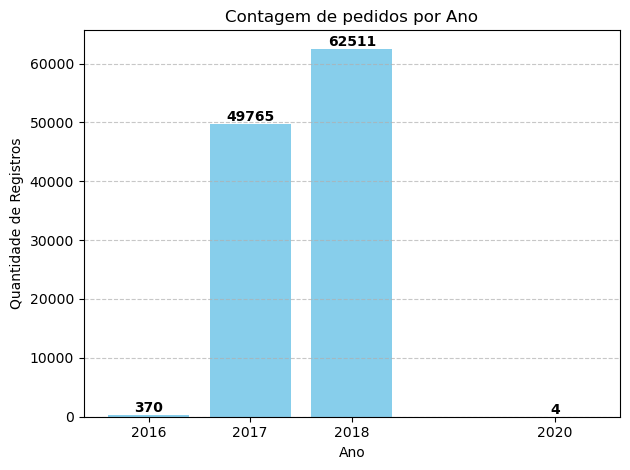

In [ ]:
# Análise gráfica da contagem de pedidos por ano, com base na coluna 'shipping_limit_date'

# Extrai o ano da data de limite de envio e conta a quantidade de registros por ano
ano_plot = olist_order_items['shipping_limit_date'].dt.year.value_counts().sort_index()

# Cria um gráfico de barras para visualizar a distribuição anual dos pedidos
plt.bar(ano_plot.index, ano_plot.values, color='skyblue')
plt.title('Contagem de pedidos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Registros')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ano_plot.index)

# Adiciona rótulos numéricos no topo de cada barra para facilitar a leitura dos valores
for i, valor in enumerate(ano_plot.values):
    plt.text(ano_plot.index[i], valor + 1, str(valor), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Filtrando apenas os registros do ano de 2020
olist_order_items.loc[olist_order_items['shipping_limit_date'].dt.year == 2020]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
8643,13bdf405f961a6deec817d817f5c6624,1,96ea060e41bdecc64e2de00b97068975,7a241947449cc45dbfda4f9d0798d9d0,2020-02-05 03:30:51,69.99,14.66
68516,9c94a4ea2f7876660fa6f1b59b69c8e6,1,282b126b2354516c5f400154398f616d,7a241947449cc45dbfda4f9d0798d9d0,2020-02-03 20:23:22,75.99,14.70
85729,c2bb89b5c1dd978d507284be78a04cb2,1,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44
85730,c2bb89b5c1dd978d507284be78a04cb2,2,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44


### <a id='toc3_6_3_'></a>[Coluna "price"](#toc0_)

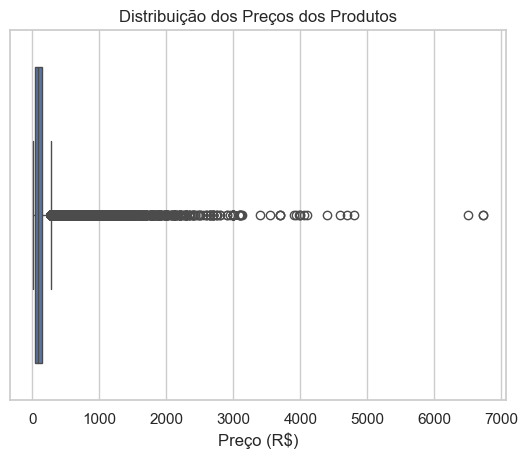

In [ ]:
# Análise da distribuição dos preços dos produtos na tabela 'olist_order_items' usando boxplot

# Estilo do gráfico
sns.set_theme(style="whitegrid")

# Plot boxplot da coluna 'price'
sns.boxplot(data=olist_order_items, x='price')

# Título e rótulos
plt.title('Distribuição dos Preços dos Produtos')
plt.xlabel('Preço (R$)')

# Mostrar o gráfico
plt.show()

In [ ]:
# Calcula o terceiro quartil (Q3) da coluna 'price', que representa o limite superior do intervalo interquartil
q3 = olist_order_items['price'].quantile(0.75)

# Filtra os registros cujo preço é maior que o terceiro quartil, identificando valores potencialmente altos (outliers superiores)
outliers_acima_q3 = olist_order_items[olist_order_items['price'] > q3]

# Conta a quantidade de registros classificados como outliers acima do Q3
quantidade_outliers = outliers_acima_q3.shape[0]

print(f"Número de valores acima do 3º quartil (Q3): {quantidade_outliers}")


Número de valores acima do 3º quartil (Q3): 28114


In [ ]:
# Calcula o 95º percentil (P95) da coluna 'price', representando o valor abaixo do qual estão 95% dos dados
p95 = olist_order_items['price'].quantile(0.95)

# Filtra os registros com preço acima do 95º percentil, identificando os valores mais altos (top 5%)
valores_acima_p95 = olist_order_items[olist_order_items['price'] > p95]

# Conta quantos registros possuem preço acima desse limite
quantidade_acima_p95 = valores_acima_p95.shape[0]

print(f"Número de valores acima do 95º percentil (P95): {quantidade_acima_p95}")

Número de valores acima do 95º percentil (P95): 5505


**Embora os valores acima do 95º percentil sejam elevados, eles não devem ser classificados como outliers,**
**pois representam cerca de 5 mil registros em uma base de 112 mil, indicando que são relativamente comuns dentro da distribuição dos dados.**


### <a id='toc3_6_4_'></a>[Coluna "freight_value"](#toc0_)

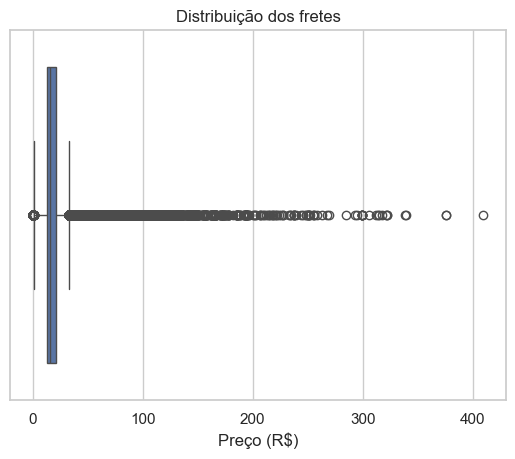

In [ ]:
# Análise visual da distribuição dos valores de frete na tabela 'olist_order_items' utilizando boxplot

# Configura o estilo do gráfico com grade branca para melhor visualização
sns.set_theme(style="whitegrid")

# Cria o boxplot para identificar mediana, dispersão, quartis e possíveis outliers na coluna 'freight_value'
sns.boxplot(data=olist_order_items, x='freight_value')

# Define título e rótulo do eixo X para contextualizar o gráfico
plt.title('Distribuição dos fretes')
plt.xlabel('Preço (R$)')

# Exibe o gráfico
plt.show()


In [ ]:
# Calcula o terceiro quartil (Q3) da coluna 'freight_value', que representa o limite superior do intervalo interquartil
q3 = olist_order_items['freight_value'].quantile(0.75)

# Filtra os registros cujo valor de frete está acima do terceiro quartil, indicando valores relativamente altos
outliers_acima_q3 = olist_order_items[olist_order_items['freight_value'] > q3]

# Conta a quantidade desses registros com frete elevado
quantidade_outliers = outliers_acima_q3.shape[0]

print(f"Número de valores acima do 3º quartil (Q3): {quantidade_outliers}")


Número de valores acima do 3º quartil (Q3): 28106


In [ ]:
# Calcula o 95º percentil (P95) da coluna 'freight_value', indicando o valor acima do qual estão os 5% maiores dados
p95 = olist_order_items['freight_value'].quantile(0.95)

# Filtra os registros cujo valor de frete está acima do 95º percentil, destacando os valores mais elevados
valores_acima_p95 = olist_order_items[olist_order_items['freight_value'] > p95]

# Conta a quantidade de registros com frete acima desse limite
quantidade_acima_p95 = valores_acima_p95.shape[0]

print(f"Número de valores acima do 95º percentil (P95): {quantidade_acima_p95}")


Número de valores acima do 95º percentil (P95): 5630


**Assim como ocorre com a coluna "price", os valores elevados em "freight_value" não devem ser classificados automaticamente como outliers,**  
**pois existe uma quantidade significativa de registros acima do terceiro quartil e até mesmo do 95º percentil,**
**indicando que esses valores fazem parte do comportamento natural da distribuição.**


## <a id='toc3_7_'></a>[Tabela: olist_order_payments](#toc0_)


### <a id='toc3_7_1_'></a>[Resumo da tabela](#toc0_)

In [63]:
# Visualização das primeiras linhas para entender estrutura, tipos e possíveis padrões nos dados
olist_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04


In [64]:
# Análise inicial da tabela: tipos de dados, quantidade de entradas, valores nulos
olist_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [65]:
# Resumo estatístico da tabela
olist_order_payments.describe(include="all") # Acrescentando o Parâmetro (include="all") para inclusão dos dados categoricos no resumo

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
# Aplica a função 'encontrar_linhas_duplicadas' no DataFrame 'olist_order_payments'
# Retorna todas as linhas que estão duplicadas com base em todas as colunas
encontrar_linhas_duplicadas(olist_order_payments)

,order_id,payment_sequential,payment_type,payment_installments,payment_value


### <a id='toc3_7_2_'></a>[Coluna "payment_sequential"](#toc0_)

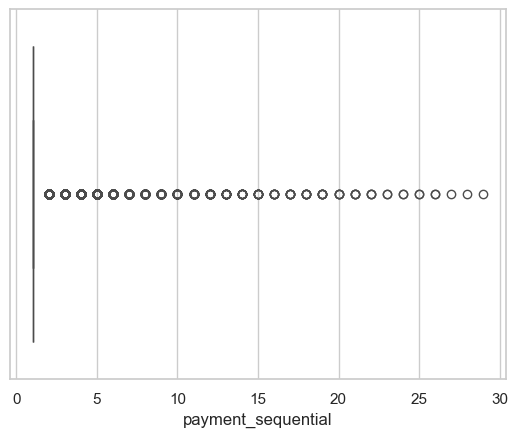

In [ ]:
# Análise visual da distribuição dos valores na coluna 'payment_sequential' do DataFrame 'olist_order_payments' usando boxplot

# Configura o estilo do gráfico com grade branca para facilitar a leitura
sns.set_theme(style="whitegrid")

# Cria o boxplot para visualizar a dispersão, mediana, quartis e possíveis outliers na coluna 'payment_sequential'
sns.boxplot(data=olist_order_payments, x='payment_sequential')

# Exibe o gráfico
plt.show()


In [ ]:
# Calcula o terceiro quartil (Q3) da coluna 'payment_sequential', que representa o limite superior do intervalo interquartil
q3 = olist_order_payments['payment_sequential'].quantile(0.75)

# Filtra os registros cujo valor em 'payment_sequential' está acima do terceiro quartil, identificando valores relativamente altos
outliers_acima_q3 = olist_order_payments[olist_order_payments['payment_sequential'] > q3]

# Conta a quantidade desses registros
quantidade_outliers = outliers_acima_q3.shape[0]

print(f"Número de valores acima do 3º quartil (Q3): {quantidade_outliers}")

Número de valores acima do 3º quartil (Q3): 4526


In [ ]:
# Calcula o 95º percentil (P95) da coluna 'payment_sequential', indicando o valor acima do qual estão os 5% maiores dados
p95 = olist_order_payments['payment_sequential'].quantile(0.95)

# Filtra os registros cujo valor em 'payment_sequential' está acima do 95º percentil, destacando os valores mais elevados
valores_acima_p95 = olist_order_payments[olist_order_payments['payment_sequential'] > p95]

# Conta a quantidade desses registros
quantidade_acima_p95 = valores_acima_p95.shape[0]

print(f"Número de valores acima do 95º percentil (P95): {quantidade_acima_p95}")


Número de valores acima do 95º percentil (P95): 4526


### <a id='toc3_7_3_'></a>[Coluna "payment_installments"](#toc0_)

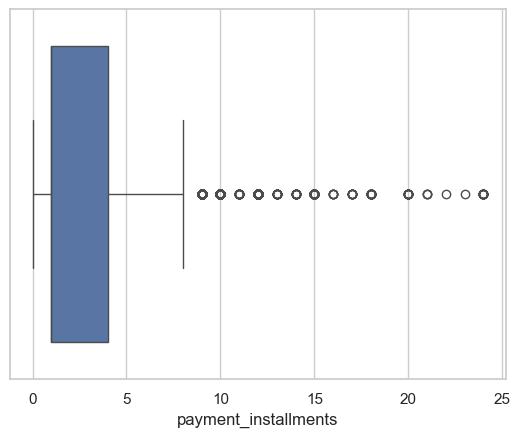

In [ ]:
# Análise visual da distribuição dos valores da coluna 'payment_installments' em 'olist_order_payments' usando boxplot

# Configura o estilo do gráfico com grade branca para facilitar a leitura
sns.set_theme(style="whitegrid")

# Cria o boxplot para visualizar mediana, dispersão, quartis e possíveis outliers na coluna 'payment_installments'
sns.boxplot(data=olist_order_payments, x='payment_installments')

# Exibe o gráfico
plt.show()

In [ ]:
# Calcula o terceiro quartil (Q3) da coluna 'payment_installments', que representa o limite superior do intervalo interquartil
q3 = olist_order_payments['payment_installments'].quantile(0.75)

# Filtra os registros onde o número de parcelas é maior que o terceiro quartil, identificando valores relativamente altos
outliers_acima_q3 = olist_order_payments[olist_order_payments['payment_installments'] > q3]

# Conta a quantidade desses registros com número elevado de parcelas
quantidade_outliers = outliers_acima_q3.shape[0]

print(f"Número de valores acima do 3º quartil (Q3): {quantidade_outliers}")


Número de valores acima do 3º quartil (Q3): 21366


In [ ]:
# Calcula o 95º percentil (P95) da coluna 'payment_installments', indicando o valor acima do qual estão os 5% maiores dados
p95 = olist_order_payments['payment_installments'].quantile(0.95)

# Filtra os registros com número de parcelas acima do 95º percentil, destacando os casos extremos
valores_acima_p95 = olist_order_payments[olist_order_payments['payment_installments'] > p95]

# Conta a quantidade desses registros
quantidade_acima_p95 = valores_acima_p95.shape[0]

print(f"Número de valores acima do 95º percentil (P95): {quantidade_acima_p95}")


Número de valores acima do 95º percentil (P95): 341


In [ ]:
# Checando o(s) valor(es) igual a zero
olist_order_payments.loc[olist_order_payments['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
10691,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94
47346,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69


### <a id='toc3_7_4_'></a>[Coluna "payment_value"](#toc0_)

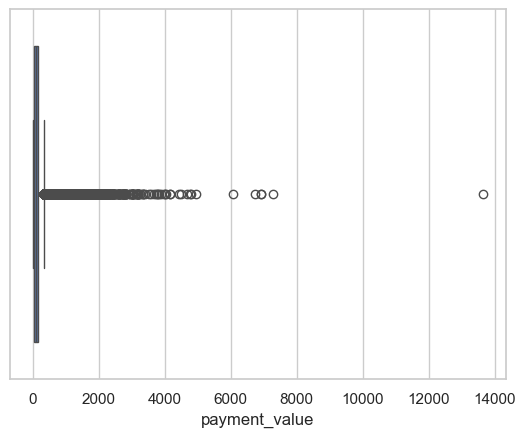

In [ ]:
# Análise visual da distribuição dos valores na coluna 'payment_value' do DataFrame 'olist_order_payments' usando boxplot

# Configura o estilo do gráfico para grade branca, facilitando a visualização dos dados
sns.set_theme(style="whitegrid")

# Cria o boxplot para mostrar mediana, dispersão, quartis e potenciais outliers em 'payment_value'
sns.boxplot(data=olist_order_payments, x='payment_value')

# Exibe o gráfico
plt.show()


In [ ]:
# Calcula o terceiro quartil (Q3) da coluna 'payment_value', que representa o limite superior do intervalo interquartil
q3 = olist_order_payments['payment_value'].quantile(0.75)

# Filtra os registros onde o valor do pagamento é maior que o terceiro quartil, indicando valores relativamente altos
outliers_acima_q3 = olist_order_payments[olist_order_payments['payment_value'] > q3]

# Conta a quantidade desses registros com pagamento elevado
quantidade_outliers = outliers_acima_q3.shape[0]

print(f"Número de valores acima do 3º quartil (Q3): {quantidade_outliers}")

Número de valores acima do 3º quartil (Q3): 25972


In [ ]:
# Calcula o 95º percentil (P95) da coluna 'payment_value', que indica o valor acima do qual estão os 5% maiores pagamentos
p95 = olist_order_payments['payment_value'].quantile(0.95)

# Filtra os registros cujo valor de pagamento está acima do 95º percentil, destacando os pagamentos mais elevados
valores_acima_p95 = olist_order_payments[olist_order_payments['payment_value'] > p95]

# Conta a quantidade desses registros
quantidade_acima_p95 = valores_acima_p95.shape[0]

print(f"Número de valores acima do 95º percentil (P95): {quantidade_acima_p95}")

Número de valores acima do 95º percentil (P95): 5195


In [ ]:
# Checando o(s) valor(es) igual a zero
olist_order_payments.loc[olist_order_payments['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
259,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
28436,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
28566,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
44305,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
56620,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
72173,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0
81460,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
101581,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
101582,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0


### <a id='toc3_7_5_'></a>[Coluna "payment_type"](#toc0_)

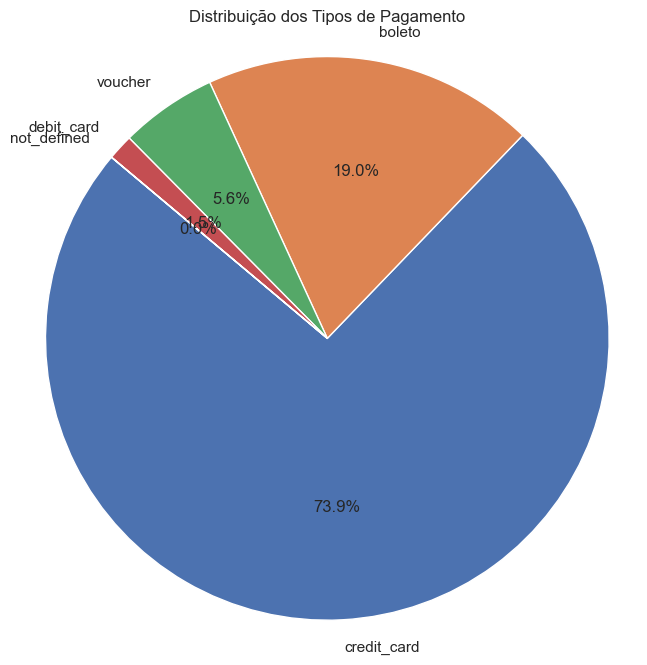

In [ ]:
# Entendendo a distribuição dos valores da coluna "payment_type"
# Calcula a contagem de registros para cada categoria na coluna 'payment_type' do DataFrame 'olist_order_payments'
pt = olist_order_payments['payment_type'].value_counts()

# Cria um gráfico de pizza para visualizar a distribuição percentual dos tipos de pagamento
plt.figure(figsize=(8, 8))
plt.pie(pt, labels=pt.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Tipos de Pagamento')
plt.axis('equal')  # Assegura que o gráfico tenha formato circular
plt.show()

In [80]:
# Checando os valores não definidos ("not_defined")
olist_order_payments.loc[olist_order_payments['payment_type'] == "not_defined"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
259,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
28566,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
81460,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


## <a id='toc3_8_'></a>[Tabela: olist_order_reviews](#toc0_)


### <a id='toc3_8_1_'></a>[Resumo da tabela](#toc0_)

In [81]:
# Visualização das primeiras linhas para entender estrutura, tipos e possíveis padrões nos dados
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [82]:
# Análise inicial da tabela: tipos de dados, quantidade de entradas, valores nulos
olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [83]:
# Resumo estatístico da tabela
olist_order_reviews.describe(include="all") # Acrescentando o Parâmetro (include="all") para inclusão dos dados categoricos no resumo

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,423,230,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [84]:
# Checando se tem linhas duplicados
encontrar_linhas_duplicadas(olist_order_reviews)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
